In [3]:
# Generate policy plot:
import numpy as np
import pickle
from build_database import flux_obj
from scipy import interpolate
from matplotlib import pyplot as plt
from GLD_file_tools import GLD_file_tools
from satellite import Satellite
import datetime
import ephem
from coordinate_structure import coordinate_structure
from coordinate_structure import transform_coords
from longitude_scaling import longitude_scaling
from ionoAbsorp import ionoAbsorp
import os
from mpl_toolkits.basemap import Basemap
from precip_model import precip_model
import itertools
from measurement_model import measurement_model
import random
import pickle

%matplotlib inline

# --------------- Latex Plot Beautification --------------------------
fig_width_pt = 650.0  # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inch
golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = fig_width*golden_mean      # height in inches
fig_size =  [fig_width+1,fig_height+1]
params = {'backend': 'ps',
          'axes.labelsize': 14,
          'text.fontsize': 14,
          'legend.fontsize': 10,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'text.usetex': False,
          'figure.figsize': fig_size}
plt.rcParams.update(params)
# --------------- Latex Plot Beautification --------------------------

(90, 180, 4, 2)


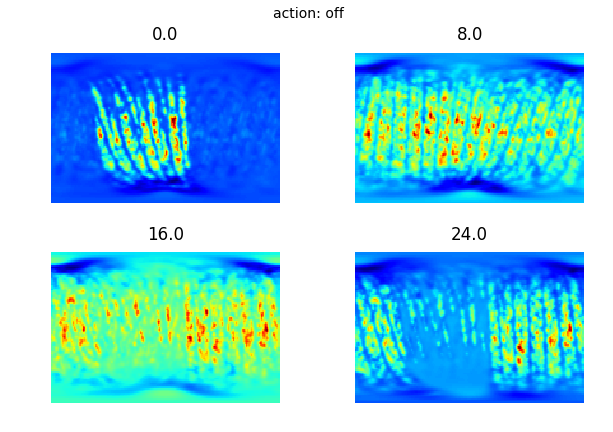

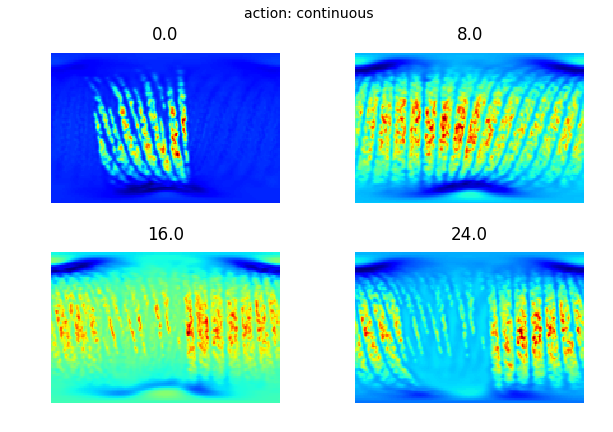

In [15]:
# load Q file:
with open('Q_i23699.pkl','rb') as file:
    Q = pickle.load(file)

    
gLats = np.linspace(-90,90,np.shape(Q)[0])
gLons = np.linspace(-180,180,np.shape(Q)[1])
gTimes =np.linspace(0,24, np.shape(Q)[2])
gActs = ['off','continuous']



# Plot each slice of Q:

for act in gActs:
    fig, ax = plt.subplots(2,2)
    ax = ax.flat
    
    for x in range(np.size(gTimes)):
        ax[x].pcolor(gLons, gLats, Q[:,:,x,gActs.index(act)]/np.max(Q))
        ax[x].set_title(gTimes[x])
        ax[x].axis('off')
        #ax[x].scatter(sat.coords.lon(),sat.coords.lat(),marker='x')
        fig.suptitle('action: %s' % (act))
    plt.show()

(90, 180, 4)
False


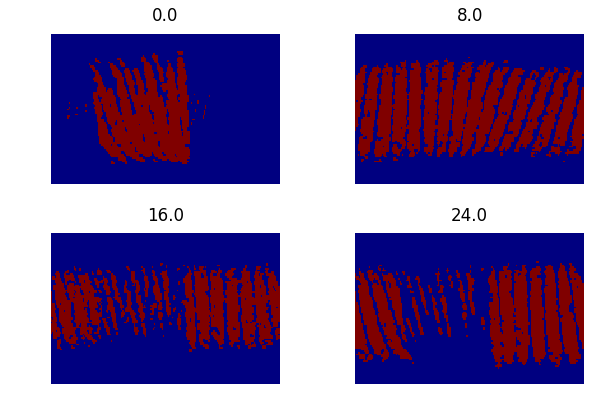

In [38]:
policy = np.argmax(Q, axis=3)
print np.shape(policy)
print np.min(policy)

fig, ax = plt.subplots(2,2)
ax = ax.flat

for x in range(np.size(gTimes)):
    ax[x].pcolor(gLons, gLats, policy[:,:,x])
    ax[x].set_title(gTimes[x])
    ax[x].axis('off')
